In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [2]:
sample = np.random.choice([1,2,3,4,5,6], 100)
sample

array([6, 4, 3, 6, 6, 2, 2, 3, 6, 2, 2, 3, 2, 5, 5, 4, 1, 5, 4, 4, 6, 6,
       5, 3, 2, 3, 5, 4, 2, 6, 6, 2, 6, 3, 5, 6, 1, 1, 1, 4, 3, 4, 4, 3,
       1, 4, 3, 2, 3, 3, 3, 3, 1, 2, 5, 4, 4, 4, 4, 2, 6, 1, 4, 6, 4, 3,
       5, 5, 1, 4, 3, 6, 4, 2, 1, 4, 6, 2, 6, 5, 3, 5, 4, 2, 5, 6, 1, 4,
       2, 2, 3, 4, 4, 4, 4, 6, 1, 4, 6, 5])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [3]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({4: 25, 6: 18, 3: 17, 2: 16, 5: 13, 1: 11})
Вероятности выпадений каждой из сторон:
{6: 0.18, 4: 0.25, 3: 0.17, 2: 0.16, 5: 0.13, 1: 0.11}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [12]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

(array([0.04592027, 0.18368107, 0.32144188, 0.32144188, 0.32144188,
        0.45920268, 0.36736214, 0.16072094, 0.0688804 , 0.04592027]),
 array([-2.08001746, -1.64447993, -1.20894241, -0.77340488, -0.33786735,
         0.09767017,  0.5332077 ,  0.96874523,  1.40428276,  1.83982028,
         2.27535781]),
 <a list of 10 Patch objects>)

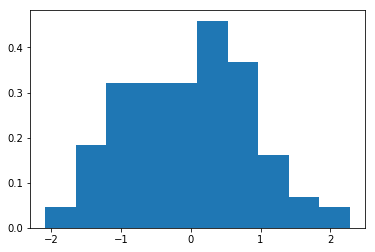

In [17]:
x = np.linspace(-4,4,100)
plt.hist(sample, density=True)

Эмпирическая функция распределения для полученной выборки:

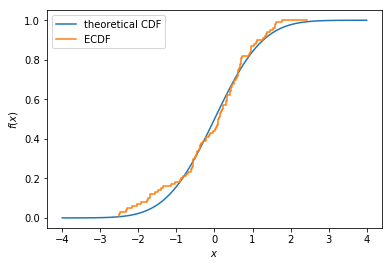

In [6]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5,0,'$x$')

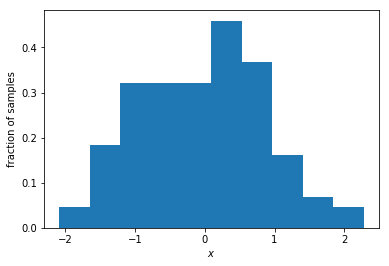

In [18]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5,0,'$x$')

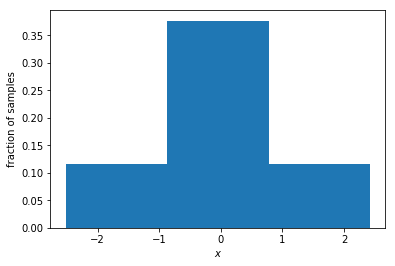

In [8]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

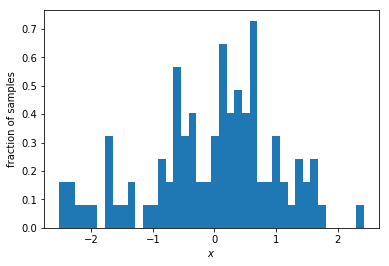

In [9]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5,0,'$x$')

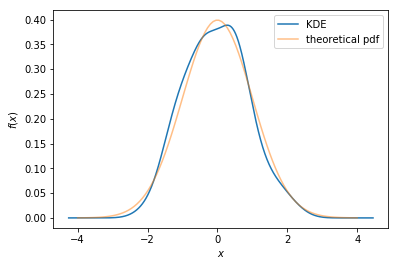

In [20]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')